<h4>Importing required Packages and loading the training and testing data</h4>

In [1]:
from scipy.io import arff
import pandas as pd
import math
import operator
import matplotlib.pyplot as plt

train_data = arff.loadarff('trainProdSelection.arff')
training_set = pd.DataFrame(train_data[0])

test_data = arff.loadarff('testProdSelection.arff')
testing_set = pd.DataFrame(test_data[0])

<h4>Printing the training data</h4>

In [2]:
training_set.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,b'student',b'spend>saving',6.0,40.0,13.62,3.2804,b'C1'
1,b'student',b'spend>saving',11.0,21.0,15.32,2.0232,b'C1'
2,b'student',b'spend>saving',7.0,64.0,16.55,3.1202,b'C1'
3,b'student',b'spend>saving',3.0,47.0,15.71,3.4022,b'C1'
4,b'student',b'spend>saving',15.0,10.0,16.96,2.2825,b'C1'


<h4>Printing the testing data</h4>

In [3]:
testing_set.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,b'student',b'spend<saving',12.0,19.0,14.7900,3.7697,b'C1'
1,b'student',b'spend>>saving',29.0,10.0,16.1900,2.4839,b'C1'
2,b'student',b'spend<<saving',28.0,60.0,15.4600,1.1885,b'C1'
3,b'engineer',b'spend>saving',15.0,41.0,21.2600,1.4379,b'C1'
4,b'librarian',b'spend<saving',2.0,9.0,19.7207,0.6913,b'C1'


<h4>Checking the datatype for every column</h4>

In [4]:
pd.DataFrame(train_data[0]).dtypes

Type          object
LifeStyle     object
Vacation     float64
eCredit      float64
salary       float64
property     float64
label         object
dtype: object

<h1>Training set pre-processing</h1>

In [5]:
training_set.Type = training_set.Type.str.decode("UTF-8")
training_set.LifeStyle = training_set.LifeStyle.str.decode("UTF-8")
training_set.label = training_set.label.str.decode("UTF-8")

In [6]:
minValue = training_set.Vacation.min()
maxValue = training_set.Vacation.max()
training_set.Vacation = training_set.Vacation.apply(lambda x:(x-minValue)/(maxValue-minValue))

minValue = training_set.eCredit.min()
maxValue = training_set.eCredit.max()
training_set.eCredit = training_set.eCredit.apply(lambda x:(x-minValue)/(maxValue-minValue))

minValue = training_set.salary.min()
maxValue = training_set.salary.max()
training_set.salary = training_set.salary.apply(lambda x:(x-minValue)/(maxValue-minValue))

minValue = training_set.property.min()
maxValue = training_set.property.max()
training_set.property = training_set.property.apply(lambda x:(x-minValue)/(maxValue-minValue))

<h1>Training set pre-processing done</h1>

<h1>Testing set pre-processing</h1>

In [7]:
testing_set.Type=testing_set.Type.str.decode("UTF-8")
testing_set.LifeStyle=testing_set.LifeStyle.str.decode("UTF-8")
testing_set.label=testing_set.label.str.decode("UTF-8")

In [8]:
minValue = testing_set.Vacation.min()
maxValue = testing_set.Vacation.max()
testing_set.Vacation = testing_set.Vacation.apply(lambda x:(x-minValue)/(maxValue-minValue))

minValue = testing_set.eCredit.min()
maxValue = testing_set.eCredit.max()
testing_set.eCredit = testing_set.eCredit.apply(lambda x:(x-minValue)/(maxValue-minValue))

minValue = testing_set.salary.min()
maxValue = testing_set.salary.max()
testing_set.salary = testing_set.salary.apply(lambda x:(x-minValue)/(maxValue-minValue))

minValue = testing_set.property.min()
maxValue = testing_set.property.max()
testing_set.property = testing_set.property.apply(lambda x:(x-minValue)/(maxValue-minValue))

<h1>Testing set pre-processing done</h1>

<h3>KNN function</h3>

In [9]:
def knn(k):
    predictions=[]
    for x in range(len(testing_set)):
        neighbors = getNeighbors(training_set.values, testing_set.values[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
    accuracy = getAccuracy(testing_set.values, predictions)
    return repr(accuracy)

In [10]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for i in range(2):
        if (instance1[i]==instance2[i]):
            distance += 1
    for x in range(2,length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)
 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors
 
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
 
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

<h4>Storing the predictions to a dictionary</h4>

In [11]:
KNN={}
for i in range(1, 100, 2):
    KNN[i]=float(knn(i))
print(KNN)

{1: 19.047619047619047, 3: 23.809523809523807, 5: 19.047619047619047, 7: 14.285714285714285, 9: 19.047619047619047, 11: 19.047619047619047, 13: 23.809523809523807, 15: 23.809523809523807, 17: 28.57142857142857, 19: 28.57142857142857, 21: 28.57142857142857, 23: 28.57142857142857, 25: 28.57142857142857, 27: 28.57142857142857, 29: 28.57142857142857, 31: 28.57142857142857, 33: 28.57142857142857, 35: 23.809523809523807, 37: 23.809523809523807, 39: 23.809523809523807, 41: 23.809523809523807, 43: 19.047619047619047, 45: 19.047619047619047, 47: 14.285714285714285, 49: 19.047619047619047, 51: 14.285714285714285, 53: 19.047619047619047, 55: 9.523809523809524, 57: 9.523809523809524, 59: 9.523809523809524, 61: 9.523809523809524, 63: 9.523809523809524, 65: 9.523809523809524, 67: 9.523809523809524, 69: 14.285714285714285, 71: 14.285714285714285, 73: 14.285714285714285, 75: 14.285714285714285, 77: 14.285714285714285, 79: 14.285714285714285, 81: 14.285714285714285, 83: 14.285714285714285, 85: 14.28571

<h4>Finding the more accurate value</h4>

In [12]:
MAX=0
for i in KNN:
    if(float(KNN[i])>=MAX):
        MAX=float(KNN[i])
print(MAX)

28.57142857142857


<h4>Adding dictionary keys and value to different lists </h4>

In [13]:
k_values=[]
Accuracy_list=[]
for i in KNN:
    k_values.append(i)
    Accuracy_list.append(float(KNN[i]))
print(k_values)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]


In [14]:
print(Accuracy_list)

[19.047619047619047, 23.809523809523807, 19.047619047619047, 14.285714285714285, 19.047619047619047, 19.047619047619047, 23.809523809523807, 23.809523809523807, 28.57142857142857, 28.57142857142857, 28.57142857142857, 28.57142857142857, 28.57142857142857, 28.57142857142857, 28.57142857142857, 28.57142857142857, 28.57142857142857, 23.809523809523807, 23.809523809523807, 23.809523809523807, 23.809523809523807, 19.047619047619047, 19.047619047619047, 14.285714285714285, 19.047619047619047, 14.285714285714285, 19.047619047619047, 9.523809523809524, 9.523809523809524, 9.523809523809524, 9.523809523809524, 9.523809523809524, 9.523809523809524, 9.523809523809524, 14.285714285714285, 14.285714285714285, 14.285714285714285, 14.285714285714285, 14.285714285714285, 14.285714285714285, 14.285714285714285, 14.285714285714285, 14.285714285714285, 14.285714285714285, 19.047619047619047, 19.047619047619047, 19.047619047619047, 23.809523809523807, 23.809523809523807, 23.809523809523807]


<h3>Ploting a graph between k_values and respective Accuracy</h3>

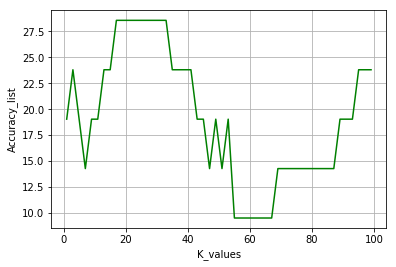

In [15]:
plt.plot(k_values,Accuracy_list,color='green')
plt.xlabel("K_values")
plt.ylabel("Accuracy_list")
plt.grid(True)
plt.show()